In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error

In [2]:
df = pd.read_csv('apple_orange_dataset.csv')
df.columns = ['File_Name', 'mean', 'std', 'skewness', 'kurtosis', 'entropy', 'Class']
df.head(10)

,File_Name,mean,std,skewness,kurtosis,entropy,Class
0,fuji_apple_078.jpg,199.8203,34.2900,-2.843273,7.431119,5.5931,apple
1,fuji_apple_087.jpg,208.0113,45.2949,-2.243651,3.738113,5.7133,apple
2,fuji_apple_086.jpg,212.8590,33.0177,-2.730839,6.727023,5.3404,apple
3,fuji_apple_092.jpg,199.5640,52.3571,-1.875190,2.151391,5.9888,apple
4,fuji_apple_051.jpg,169.1817,50.5779,-1.442871,0.656427,6.6008,apple
5,fuji_apple_133.jpg,193.2563,43.1780,-1.930700,2.753501,6.2881,apple
6,fuji_apple_053.jpg,185.6141,33.0142,-2.472931,6.053361,6.1372,apple
7,fuji_apple_084.jpg,215.2834,36.8983,-2.947320,7.850316,5.3979,apple
8,fuji_apple_090.jpg,203.5860,45.6359,-2.020478,2.865330,5.9343,apple
9,fuji_apple_091.jpg,215.3525,37.6083,-2.963053,7.877011,5.4118,apple


In [3]:
df.shape

(199, 7)

In [4]:
labelencoder = LabelEncoder()

In [5]:
df['Class'] = labelencoder.fit_transform(df['Class'])
df.tail(5)

,File_Name,mean,std,skewness,kurtosis,entropy,Class
194,orange_019.jpg,167.4263,64.8242,0.032085,-1.317752,7.0671,1
195,orange_033.jpg,186.5760,52.3012,-0.281874,-0.936126,6.9011,1
196,orange_027.jpg,155.7226,53.5377,0.541147,-0.552217,7.0161,1
197,orange_026.jpg,174.6010,58.3386,-0.101109,-0.981505,6.9946,1
198,orange_032.jpg,171.0606,67.6710,-0.274480,-1.190420,7.1990,1


In [6]:
df = df.sample(frac=1)
df = df.reset_index(drop=True)

In [7]:
df.head(10)

,File_Name,mean,std,skewness,kurtosis,entropy,Class
0,fuji_apple_190.jpg,214.9015,35.5995,-3.107269,9.128829,5.4465,0
1,orange_064.jpg,192.8663,39.7223,-0.347066,-0.124741,6.2625,1
2,orange_094.jpg,189.1800,57.2956,-0.314344,-1.265098,6.8366,1
3,fuji_apple_211.jpg,217.2113,30.6758,-3.076094,9.431049,5.4997,0
4,fuji_apple_135.jpg,189.7407,45.7661,-1.878235,2.191637,6.0855,0
5,fuji_apple_069.jpg,208.2688,33.7939,-3.047938,8.440234,5.2923,0
6,fuji_apple_030.jpg,172.4875,33.0339,-2.189748,4.756529,6.2588,0
7,orange_026.jpg,174.6010,58.3386,-0.101109,-0.981505,6.9946,1
8,orange_008.jpg,167.8031,62.7830,-0.269957,-1.036435,7.4913,1
9,fuji_apple_046.jpg,183.0220,30.3119,-2.355751,5.420894,5.9572,0


## Data Normalization

In [8]:
sc = StandardScaler()

In [9]:
x = df.iloc[:, 1:-1]
Y = df.iloc[:, -1]

In [10]:
x.head(5)

,mean,std,skewness,kurtosis,entropy
0,214.9015,35.5995,-3.107269,9.128829,5.4465
1,192.8663,39.7223,-0.347066,-0.124741,6.2625
2,189.1800,57.2956,-0.314344,-1.265098,6.8366
3,217.2113,30.6758,-3.076094,9.431049,5.4997
4,189.7407,45.7661,-1.878235,2.191637,6.0855


In [11]:
X = sc.fit_transform(x)

In [12]:
pd.DataFrame(X).head(5)

,0,1,2,3,4
0,1.594746,-1.179098,-1.714654,2.156807,-1.751651
1,0.267563,-0.784178,0.836153,-0.583599,-0.322286
2,0.045537,0.899158,0.866393,-0.921311,0.683349
3,1.733865,-1.650737,-1.685844,2.246308,-1.658462
4,0.079308,-0.205246,-0.578857,0.102387,-0.632332


In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

In [14]:
x_train.shape

(139, 5)

In [15]:
x_test.shape

(60, 5)

## Exploration

/opt/anaconda3/envs/akshit_venv/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/envs/akshit_venv/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/envs/akshit_venv/lib/python3.7/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/anaconda3/envs/akshit_venv/lib/python3.7/s

array([[<AxesSubplot:xlabel='mean', ylabel='mean'>,
        <AxesSubplot:xlabel='std', ylabel='mean'>,
        <AxesSubplot:xlabel='skewness', ylabel='mean'>,
        <AxesSubplot:xlabel='kurtosis', ylabel='mean'>,
        <AxesSubplot:xlabel='entropy', ylabel='mean'>],
       [<AxesSubplot:xlabel='mean', ylabel='std'>,
        <AxesSubplot:xlabel='std', ylabel='std'>,
        <AxesSubplot:xlabel='skewness', ylabel='std'>,
        <AxesSubplot:xlabel='kurtosis', ylabel='std'>,
        <AxesSubplot:xlabel='entropy', ylabel='std'>],
       [<AxesSubplot:xlabel='mean', ylabel='skewness'>,
        <AxesSubplot:xlabel='std', ylabel='skewness'>,
        <AxesSubplot:xlabel='skewness', ylabel='skewness'>,
        <AxesSubplot:xlabel='kurtosis', ylabel='skewness'>,
        <AxesSubplot:xlabel='entropy', ylabel='skewness'>],
       [<AxesSubplot:xlabel='mean', ylabel='kurtosis'>,
        <AxesSubplot:xlabel='std', ylabel='kurtosis'>,
        <AxesSubplot:xlabel='skewness', ylabel='kurtosis'>,
 

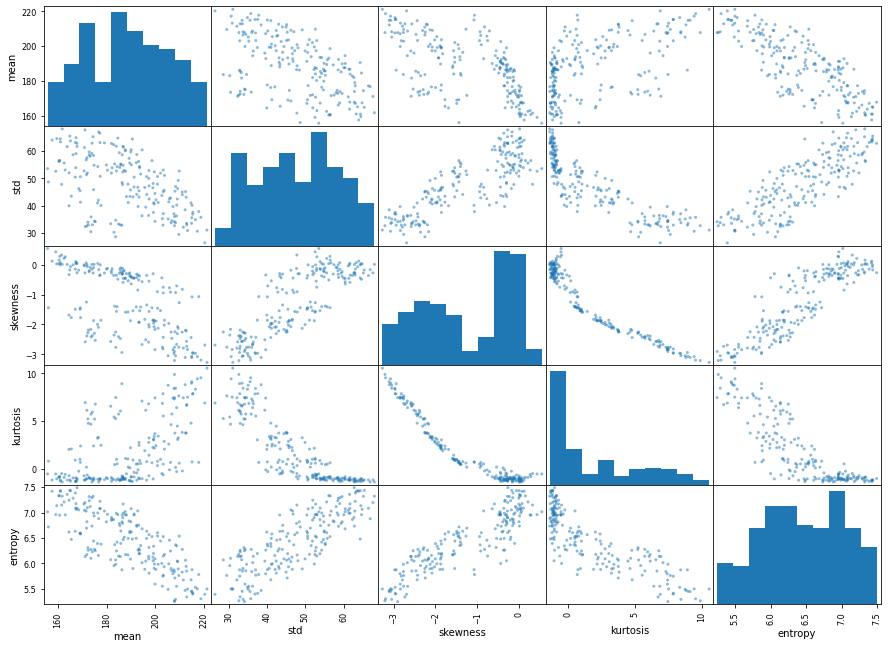

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(df.iloc[:,1:-1], figsize=(15,11))

<AxesSubplot:>

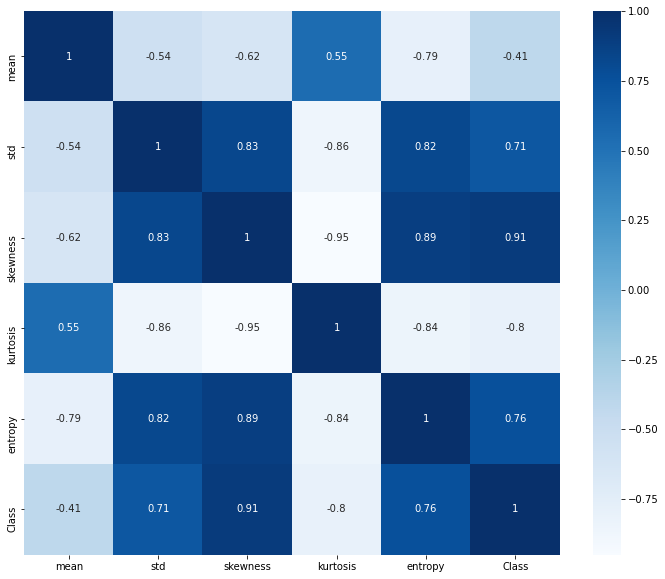

In [17]:
# correlation range = [-1, 1]
# negative corr = independent
# positive corr = dependent
fig, axes = plt.subplots(1, 1, figsize=(12, 10))

corr_matrix = df.iloc[:, 1:].corr().round(2)

sns.heatmap(data=corr_matrix, annot=True, cmap="Blues")

## Classification Models

### 1. Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
clf_LG = LogisticRegression(max_iter=200)
clf_LG_CV = cross_val_score(clf_LG, x_train, y_train)
clf_LG_CV.mean()

0.9928571428571429

In [20]:
clf_LG.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [21]:
y_train_pred_LG = clf_LG.predict(x_train)

In [22]:
y_test_pred_LG = clf_LG.predict(x_test)

In [23]:
print("Training accuracy = ", accuracy_score(y_train, y_train_pred_LG))
print("Testing accuracy = ", accuracy_score(y_test, y_test_pred_LG))

Training accuracy =  0.9928057553956835
Testing accuracy =  0.9833333333333333


In [24]:
print("MAE training = ", mean_absolute_error(y_train, y_train_pred_LG))
print("MAE testing = ", mean_absolute_error(y_test, y_test_pred_LG))

MAE training =  0.007194244604316547
MAE testing =  0.016666666666666666


### 2. Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier()
clf_RF_CV = cross_val_score(clf_RF, x_train, y_train)
print(clf_RF_CV)
print("Mean Score = ", clf_RF_CV.mean())

[1.         0.96428571 1.         0.96428571 0.96296296]
Mean Score =  0.9783068783068783


In [26]:
clf_RF.fit(x_train, y_train)

RandomForestClassifier()

In [27]:
y_train_pred_RF = clf_RF.predict(x_train)

y_test_pred_RF = clf_RF.predict(x_test)

print("Training accuracy = ", accuracy_score(y_train, y_train_pred_RF))
print("Testing accuracy = ", accuracy_score(y_test, y_test_pred_RF))

print("MAE training = ", mean_absolute_error(y_train, y_train_pred_RF))
print("MAE testing = ", mean_absolute_error(y_test, y_test_pred_RF))

Training accuracy =  1.0
Testing accuracy =  1.0
MAE training =  0.0
MAE testing =  0.0


### 3. SVM

In [28]:
from sklearn.svm import SVC

clf_SVM = SVC()
clf_SVM_CV = cross_val_score(clf_SVM, x_train, y_train)

print(clf_SVM_CV)
print("Mean Score = ", clf_SVM_CV.mean())

[1. 1. 1. 1. 1.]
Mean Score =  1.0


In [29]:
clf_SVM.fit(x_train, y_train)

y_train_pred_SVM = clf_SVM.predict(x_train)

y_test_pred_SVM = clf_SVM.predict(x_test)

print("Training accuracy = ", accuracy_score(y_train, y_train_pred_SVM))
print("Testing accuracy = ", accuracy_score(y_test, y_test_pred_SVM))
print()
print("MAE training = ", mean_absolute_error(y_train, y_train_pred_SVM))
print("MAE testing = ", mean_absolute_error(y_test, y_test_pred_SVM))

Training accuracy =  1.0
Testing accuracy =  1.0

MAE training =  0.0
MAE testing =  0.0


### 4. KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
for i in range(1, 21, 2):
    clf = KNeighborsClassifier(n_neighbors= i)
    clf_CV = cross_val_score(clf, x_train, y_train)
    print(f"For {i} neighbors, Mean Score = {clf_CV.mean()}")

For 1 neighbors, Mean Score = 0.9783068783068783
For 3 neighbors, Mean Score = 0.9711640211640212
For 5 neighbors, Mean Score = 0.9854497354497355
For 7 neighbors, Mean Score = 0.9854497354497355
For 9 neighbors, Mean Score = 0.9783068783068783
For 11 neighbors, Mean Score = 0.9854497354497355
For 13 neighbors, Mean Score = 0.9640211640211641
For 15 neighbors, Mean Score = 0.9640211640211641
For 17 neighbors, Mean Score = 0.9640211640211641
For 19 neighbors, Mean Score = 0.9425925925925925


In [34]:
clf_KNN = KNeighborsClassifier(n_neighbors=5)
clf_KNN.fit(x_train, y_train)

KNeighborsClassifier()

In [35]:
y_train_pred_KNN = clf_KNN.predict(x_train)

y_test_pred_KNN = clf_KNN.predict(x_test)

print("Training accuracy = ", accuracy_score(y_train, y_train_pred_KNN))
print("Testing accuracy = ", accuracy_score(y_test, y_test_pred_KNN))
print()
print("MAE training = ", mean_absolute_error(y_train, y_train_pred_KNN))
print("MAE testing = ", mean_absolute_error(y_test, y_test_pred_KNN))

Training accuracy =  0.9928057553956835
Testing accuracy =  0.9833333333333333

MAE training =  0.007194244604316547
MAE testing =  0.016666666666666666
